In [121]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from koreanize_matplotlib import koreanize
koreanize()

In [122]:
df = []
for i in range(1,13):
    data = f'./data/넙치csv/2021/2021.{i}.csv'
    d = pd.read_csv(data, encoding='utf-8')
    df.append(d)

FileNotFoundError: [Errno 2] No such file or directory: './data/넙치csv/2021/2021.1.csv'

In [ ]:
df[5]

In [123]:
df_all = pd.concat(df, ignore_index=True)

ValueError: No objects to concatenate

In [ ]:
df_all['어종'].unique()

In [ ]:
all_files = []
for year in range(2021, 2025):
    path_pattern = f'./data/넙치csv/{year}/*.csv'
    all_files.extend(glob.glob(path_pattern))

combined_df = pd.concat([pd.read_csv(file, encoding='utf-8') for file in all_files], ignore_index=True)

In [ ]:
dfs = []
for year in range(2021, 2025):
    for month in range(1, 13):
        file = f'./data/넙치csv/{year}/{year}-{month}.csv'
        if os.path.exists(file):
            df = pd.read_csv(file, encoding='utf-8')
            df['year'] = year
            df['month'] = month
            dfs.append(df)

data_all = pd.concat(dfs, ignore_index=True)

In [103]:
# datetime 형식
data_all['date'] = pd.to_datetime(
    dict(year=data_all['year'], month=data_all['month'], day=1)
)

In [104]:
data_all.head()

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,year,month,date
0,(활)넙치,속초,중,kg,29.2,1.0,"29,000","6,000","20,700",2021,1,2021-01-01
1,(활)넙치,통영,3미,kg,3.4,1.0,"6,000","6,000","6,000",2021,1,2021-01-01
2,(활)넙치,목포,중,kg,505.5,1.0,"33,000","10,000","20,900",2021,1,2021-01-01
3,(활)넙치,부산(기장),중,kg,"1,646.7",1.0,"28,000","7,000","18,800",2021,1,2021-01-01
4,(활)넙치,보령,중,kg,8.3,1.0,"11,000","3,000","8,400",2021,1,2021-01-01


In [111]:
fish = data_all['어종'].unique()

In [112]:
data_all['산지'].unique()

array(['속초', '통영', '목포', '부산(기장)', '보령', '군산', '서천', '진도', '완도', '여수',
       '중국', '제주도', '안흥', '태안', '나로도', '대부도', '일본', '격포', '고흥', '대천',
       '안면도', '화성', '서산', '신안', '영광', '장항', '부안', '인천', '당진', '후포', '포항',
       '거제도', '동해시', '거진', '임원', '고성', '삼천포', '방어진', '남해', '고창', '강화',
       '강구', '영흥도', '마산'], dtype=object)

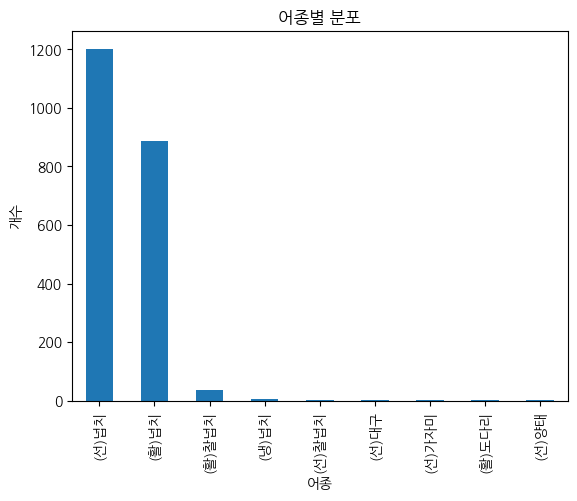

In [124]:
fish_counts = data_all['어종'].value_counts()

# 막대그래프 그리기
counts.plot(kind='bar')
plt.xlabel('어종')
plt.ylabel('개수')
plt.title('어종별 분포')
plt.show()

In [133]:
area_counts = data_all['산지'].value_counts()

counts.plot(kind='bar')
plt.xlabel('')
plt.ylabel('개수')
plt.title
plt.show()